# Summary Statistics

## Mean and median

In [2]:
import pandas as pd

In [3]:
food_consumption = pd.read_csv('foot_consumption.txt')

In [4]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption =  food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median)

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
<bound method DataFrame.median of     Unnamed: 0 country food_category  consumption  co2_emission
55          56     USA          pork        27.64         97.83
56          57     USA       poultry        50.01         53.72
57          58     USA          beef        36.24       1118.29
58          59     USA     lamb_goat         0.43         15.06
59          60     USA          fish        12.35         19.72
60          61     USA          eggs        14.58         13.39
61          62     USA         dairy       254.69        362.78
62          63     USA         wheat        80.43         15.34
63          64     USA          rice         6.88          8.80
64          65     USA      soybeans         0.04          0.0

In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


## Mean vs. median

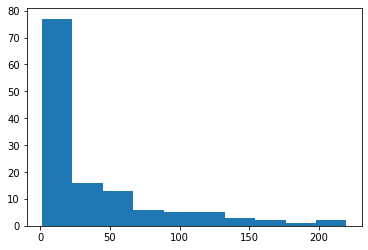

In [6]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption.co2_emission)
plt.show()

In [7]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?
- median

## Quartiles, quantiles, and quintiles

In [9]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption.co2_emission,[0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [10]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption.co2_emission, np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [11]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption.co2_emission, np.linspace(0,1,10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


## Variance and standard deviation

 Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two.m

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


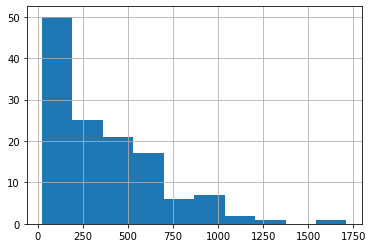

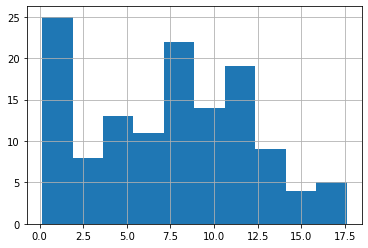

In [12]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

## Finding outliers using IQR

In [13]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg('sum')

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3-q1

In [15]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [16]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) |(emissions_by_country > upper) ]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# Random Numbers and Probability

## Calculating probabilities

In [17]:
amir_deals = pd.read_csv('amir_deals.csv')

In [18]:
amir_deals.head()

,Unnamed: 0,Unnamed: 0.1,product,client,status,amount,num_users
0,0,1,Product F,Current,Won,7389.52,19
1,1,2,Product C,New,Won,4493.01,43
2,2,3,Product B,New,Won,5738.09,87
3,3,4,Product I,Current,Won,2591.24,83
4,4,5,Product E,Current,Won,6622.97,17


In [19]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product J     2
Product G     2
Name: product, dtype: int64


In [20]:
# Calculate probability of picking a deal with each product
probs = counts/amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product J    0.011236
Product G    0.011236
Name: product, dtype: float64


If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?
- 8.42%

## Sampling deals

In [21]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace = False)
print(sample_without_replacement)

     Unnamed: 0  Unnamed: 0.1    product   client status   amount  num_users
127         127           128  Product B  Current    Won  2070.25          7
148         148           149  Product D  Current    Won  3485.48         52
77           77            78  Product B  Current    Won  6252.30         27
104         104           105  Product D  Current    Won  4110.98         39
166         166           167  Product C      New   Lost  3779.86         11


In [22]:
# Sample 5 deals without replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0  Unnamed: 0.1    product   client status   amount  num_users
133         133           134  Product D  Current    Won  5992.86         98
101         101           102  Product H  Current    Won  5116.34         63
110         110           111  Product B  Current    Won   696.88         44
49           49            50  Product B  Current    Won  3488.36         79
56           56            57  Product D  Current    Won  6820.84         42


## Creating a probability distribution

In [23]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')

In [24]:
restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


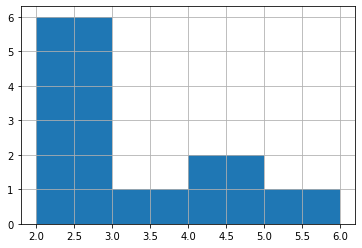

In [25]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

In [26]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [27]:
# Calculate expected value
expected_value = np.sum(size_dist['prob'] * size_dist['group_size'])
print(expected_value)

2.9000000000000004


In [29]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist['group_size'] >= 4

In [31]:
size_dist[groups_4_or_more]['prob']

1    0.2
2    0.1
Name: prob, dtype: float64

In [30]:
# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum((size_dist[groups_4_or_more]['prob']))
print(prob_4_or_more)

0.30000000000000004


## Data back-ups

In [32]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


In [33]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(30, min_time, max_time) - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


In [34]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


## Simulating wait times

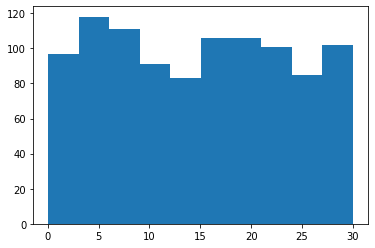

In [35]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

 Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

## Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on.

In [70]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
#np.random.seed(10)

# Simulate a single deal 1 week
print(binom.rvs(1, .3, size=1))
# 1 or 0

[1]


In [71]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, .3, size=1))

[1]


In [72]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, .3, size=52)

# Print mean deals won per week
print(deals.mean())

0.8653846153846154


Amir won 0.86 deals on average each week.

In [73]:
deals

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0,
       2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 3, 1, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0])

## Calculating binomial probabilities

In [75]:
# Probability of closing 3 out of 3 deals per week
prob_3 = binom.pmf(3, 3, .3)

print(prob_3)

0.026999999999999982


In [76]:
# Probability of closing <= 1 deal out of 3 deals per week
prob_less_than_or_equal_1 = binom.cdf(1, 3, .3)

print(prob_less_than_or_equal_1)

0.7839999999999999


In [77]:
# Probability of closing > 1 deal out of 3 deals per week
prob_greater_than_1 = 1 - binom.cdf(1, 3, .3)

print(prob_greater_than_1)

0.21600000000000008


Amir has about a 22% chance of closing more than one deal in a week.

## How many sales will be won?

In [78]:
# Expected number won with 30% win rate
# the expected number of sales out of the 3 (deal) he works on that Amir will win each week if he maintains his 30% win rate.
won_30pct = 3 * .3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * .25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * .35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


 If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.